In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu4.csv')
data.head()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0   63581743         0  60.0         0  11.0        0        1       0   
1  132761049         0  43.0         0  11.0        0        1       0   
2  921317019         0  48.0         0  11.0        0        1       0   
3  727598473         0  35.0         1  10.0        0        0       1   
4  450221861         0  51.0         0  14.0        0        0       0   

   EDUCATION  OCCUPATION  ...  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  \
0          3           6  ...   11         0        1    4461.0         2   
1          4           8  ...    1         0        1       0.0         0   
2          1           5  ...    1         4        1       0.0         0   
3          4           1  ...    4         5        0   38690.0         2   
4          0           8  ...    7         0        1       0.0         0   

   REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
0        0        3      0.0     18.0           0  
1        0        0      0.0      1.0           0  
2        0        2      0.0     10.0           0  
3        0        3      0.0     10.0           0  
4        0        0      0.0      6.0           0  

[5 rows x 23 columns]

In [3]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


              ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0       63581743         0  60.0         0  11.0        0        1       0   
1      132761049         0  43.0         0  11.0        0        1       0   
2      921317019         0  48.0         0  11.0        0        1       0   
3      727598473         0  35.0         1  10.0        0        0       1   
4      450221861         0  51.0         0  14.0        0        0       0   
...          ...       ...   ...       ...   ...      ...      ...     ...   
10297   67790126         1  45.0         2   9.0        0        0       0   
10298   61970712         0  46.0         0   9.0        0        0       0   
10299  849208064         0  48.0         0  15.0        0        0       1   
10300  627828331         0  50.0         0   7.0        0        0       1   
10301  680381960         0  52.0         0  11.0        0        0       1   

       EDUCATION  OCCUPATION  ...  BLUEBOOK  TIF  CAR_TYPE  RED

Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):
OLDCLAIM      0.039861
CLM_FREQ      0.036150
CLM_AMT       0.034635
MVR_PTS       0.030884
REVOKED       0.027991
KIDSDRIV      0.025934
HOMEKIDS      0.019927
PARENT1       0.017233
CAR_AGE       0.015600
BLUEBOOK      0.014671
MSTATUS       0.013801
TRAVTIME      0.011718
OCCUPATION    0.010869
RED_CAR       0.009590
YOJ           0.009258
CAR_USE       0.009224
EDUCATION     0.009060
GENDER        0.008942
ID            0.008646
TIF           0.005615
CAR_TYPE      0.004476
AGE           0.004350
dtype: float64


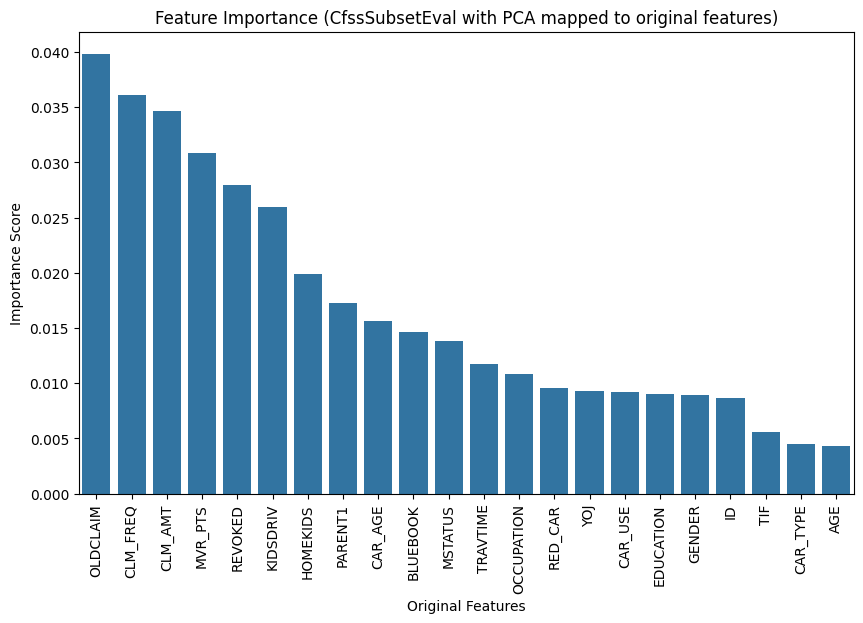


Selected Features (Threshold-Based Selection):
OLDCLAIM      0.039861
CLM_FREQ      0.036150
CLM_AMT       0.034635
MVR_PTS       0.030884
REVOKED       0.027991
KIDSDRIV      0.025934
HOMEKIDS      0.019927
PARENT1       0.017233
CAR_AGE       0.015600
BLUEBOOK      0.014671
MSTATUS       0.013801
TRAVTIME      0.011718
OCCUPATION    0.010869
RED_CAR       0.009590
YOJ           0.009258
CAR_USE       0.009224
EDUCATION     0.009060
GENDER        0.008942
ID            0.008646
TIF           0.005615
CAR_TYPE      0.004476
AGE           0.004350
dtype: float64

Selected Top-10 Features:
OLDCLAIM    0.039861
CLM_FREQ    0.036150
CLM_AMT     0.034635
MVR_PTS     0.030884
REVOKED     0.027991
KIDSDRIV    0.025934
HOMEKIDS    0.019927
PARENT1     0.017233
CAR_AGE     0.015600
BLUEBOOK    0.014671
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
OLDCLAIM    0.039861
CLM_FREQ    0.036150
CLM_AMT     0.034635
MVR_PTS     0.030884
REVOKED     0.027991
KIDSDRIV    0.0259

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply PCA to retain 95% of the variance
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Evaluate the importance of principal components using mutual information
    mi = mutual_info_classif(X_train_pca, y_train)
    pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]).sort_values(ascending=False)

    # Get the loadings (components)
    loadings = pca.components_

    # Calculate the importance of the original features
    original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
    importance_scores += original_feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (CfssSubsetEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):
PARENT1       0.488721
HOMEKIDS      0.400652
BLUEBOOK      0.317456
RED_CAR       0.313339
MVR_PTS       0.307559
OLDCLAIM      0.285330
CLM_FREQ      0.285099
REVOKED       0.226177
CAR_USE       0.199431
AGE           0.179584
GENDER        0.148700
CLM_AMT       0.132232
CAR_AGE       0.130569
MSTATUS       0.128064
OCCUPATION    0.118212
KIDSDRIV      0.112415
CAR_TYPE      0.112225
EDUCATION     0.087080
YOJ           0.081982
TIF           0.055655
ID            0.016831
TRAVTIME      0.007574
dtype: float64


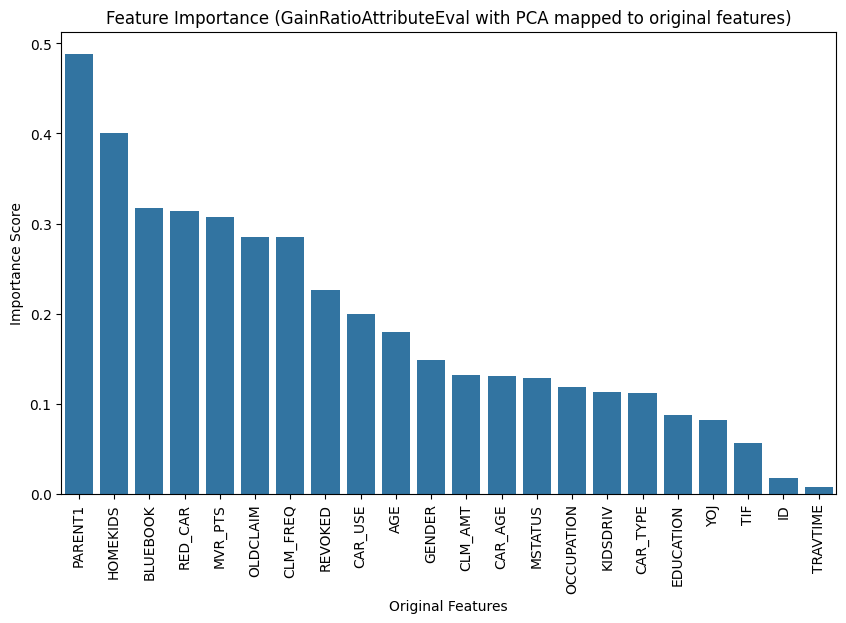


Cross-Validation Scores:
[1. 1. 1. 1. 1.]

Selected Features (Threshold-Based Selection):
PARENT1       0.488721
HOMEKIDS      0.400652
BLUEBOOK      0.317456
RED_CAR       0.313339
MVR_PTS       0.307559
OLDCLAIM      0.285330
CLM_FREQ      0.285099
REVOKED       0.226177
CAR_USE       0.199431
AGE           0.179584
GENDER        0.148700
CLM_AMT       0.132232
CAR_AGE       0.130569
MSTATUS       0.128064
OCCUPATION    0.118212
KIDSDRIV      0.112415
CAR_TYPE      0.112225
EDUCATION     0.087080
YOJ           0.081982
TIF           0.055655
ID            0.016831
TRAVTIME      0.007574
dtype: float64

Selected Top-10 Features:
PARENT1     0.488721
HOMEKIDS    0.400652
BLUEBOOK    0.317456
RED_CAR     0.313339
MVR_PTS     0.307559
OLDCLAIM    0.285330
CLM_FREQ    0.285099
REVOKED     0.226177
CAR_USE     0.199431
AGE         0.179584
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
PARENT1     0.488721
HOMEKIDS    0.400652
BLUEBOOK    0.317456
RED_CAR     0.313

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Calculate Information Gain (mutual information) for principal components
ig = mutual_info_classif(X_pca, y)

# Calculate Intrinsic Value for each principal component
X_pca_abs = np.abs(X_pca)
intrinsic_value = -np.sum(X_pca_abs * np.log2(X_pca_abs + 1e-9), axis=0) / len(X_pca)

# Compute Gain Ratio for each principal component
gain_ratio = ig / (intrinsic_value + 1e-9)  # Adding a small constant to avoid division by zero
pc_importance = pd.Series(gain_ratio, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features
original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
original_feature_importance_series = pd.Series(original_feature_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (GainRatioAttributeEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
model = RandomForestClassifier()  # You can use any classifier for cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')  # Using ROC AUC as the scoring metric

print("\nCross-Validation Scores:")
print(cv_scores)

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


In [6]:
!pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=2262ada2208cdd6bee2d53a36721fd485dcc5071e64c94c25706ccf2c78cbd62
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


Feature Importance Scores (ReliefFAttributeEval):
CLM_AMT       0.333900
OCCUPATION    0.080674
CAR_TYPE      0.067754
EDUCATION     0.056824
AGE           0.035427
MVR_PTS       0.035265
CLM_FREQ      0.031081
MSTATUS       0.030412
ID            0.029620
BLUEBOOK      0.025635
TRAVTIME      0.024103
CAR_AGE       0.022368
TIF           0.019615
HOMEKIDS      0.017647
RED_CAR       0.016443
CAR_USE       0.012677
GENDER        0.012017
YOJ           0.011692
REVOKED       0.010270
KIDSDRIV      0.007989
OLDCLAIM      0.006039
PARENT1       0.001543
dtype: float64


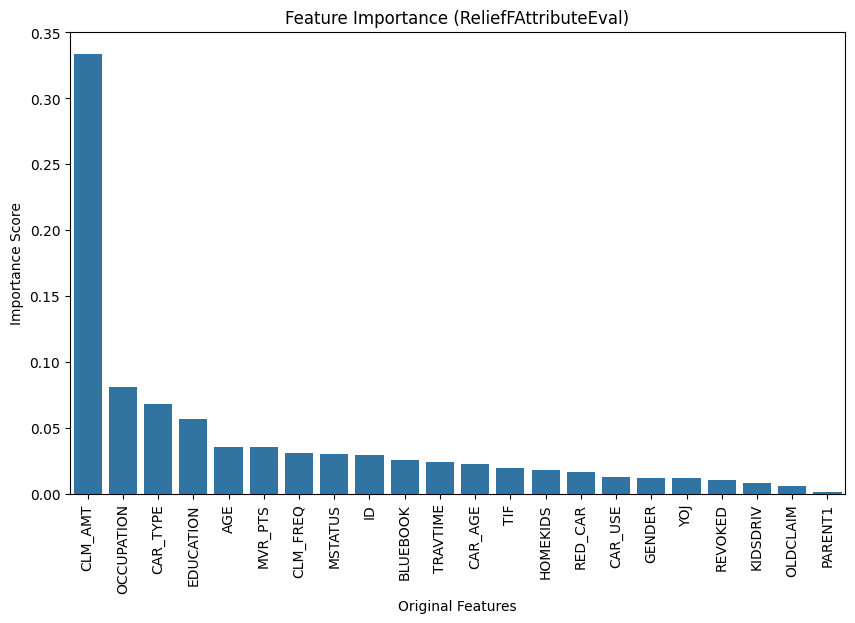


Cross-Validation Scores:
[1. 1. 1. 1. 1.]

Selected Features (Threshold-Based Selection):
CLM_AMT       0.333900
OCCUPATION    0.080674
CAR_TYPE      0.067754
EDUCATION     0.056824
AGE           0.035427
MVR_PTS       0.035265
CLM_FREQ      0.031081
MSTATUS       0.030412
ID            0.029620
BLUEBOOK      0.025635
TRAVTIME      0.024103
CAR_AGE       0.022368
TIF           0.019615
HOMEKIDS      0.017647
RED_CAR       0.016443
CAR_USE       0.012677
GENDER        0.012017
YOJ           0.011692
REVOKED       0.010270
KIDSDRIV      0.007989
OLDCLAIM      0.006039
dtype: float64

Selected Top-10 Features:
CLM_AMT       0.333900
OCCUPATION    0.080674
CAR_TYPE      0.067754
EDUCATION     0.056824
AGE           0.035427
MVR_PTS       0.035265
CLM_FREQ      0.031081
MSTATUS       0.030412
ID            0.029620
BLUEBOOK      0.025635
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
CLM_AMT       0.333900
OCCUPATION    0.080674
CAR_TYPE      0.067754
EDUCATION     

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded in X and y as per your previous code

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure the data is in floating-point format
X_float = X_scaled.astype(np.float64)
y_float = y.astype(np.float64)

# Evaluate the importance of original features using ReliefF
relief = ReliefF(n_neighbors=10, n_features_to_select=X.shape[1])
X_relief = relief.fit_transform(X_float, y_float)  # Transform X using ReliefF
feature_importances = relief.feature_importances_

# Print the feature importance scores of the original features
original_feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Feature Importance Scores (ReliefFAttributeEval):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (ReliefFAttributeEval)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
model = RandomForestClassifier()  # You can use any classifier for cross-validation
cv_scores = cross_val_score(model, X_float, y_float, cv=5, scoring='roc_auc')  # Using ROC AUC as the scoring metric

print("\nCross-Validation Scores:")
print(cv_scores)

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (PCA-IG mapped to original features):
CLM_AMT       0.075130
CLM_FREQ      0.037473
KIDSDRIV      0.031257
MVR_PTS       0.023578
PARENT1       0.018989
HOMEKIDS      0.018120
OLDCLAIM      0.014380
MSTATUS       0.013458
BLUEBOOK      0.013350
OCCUPATION    0.011463
REVOKED       0.011244
CAR_TYPE      0.010996
ID            0.005641
AGE           0.005175
CAR_USE       0.004906
EDUCATION     0.004747
TRAVTIME      0.004358
YOJ           0.004104
RED_CAR       0.002719
CAR_AGE       0.001861
TIF           0.000074
GENDER        0.000025
dtype: float64


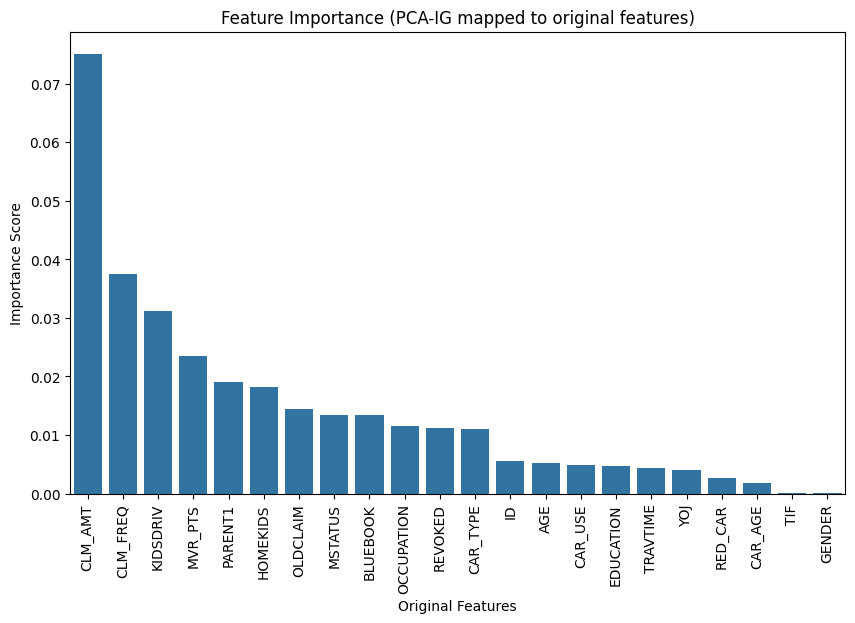


Selected Features (Threshold-Based Selection):
CLM_AMT       0.075130
CLM_FREQ      0.037473
KIDSDRIV      0.031257
MVR_PTS       0.023578
PARENT1       0.018989
HOMEKIDS      0.018120
OLDCLAIM      0.014380
MSTATUS       0.013458
BLUEBOOK      0.013350
OCCUPATION    0.011463
REVOKED       0.011244
CAR_TYPE      0.010996
ID            0.005641
AGE           0.005175
CAR_USE       0.004906
EDUCATION     0.004747
TRAVTIME      0.004358
YOJ           0.004104
RED_CAR       0.002719
dtype: float64

Selected Top-10 Features:
CLM_AMT       0.075130
CLM_FREQ      0.037473
KIDSDRIV      0.031257
MVR_PTS       0.023578
PARENT1       0.018989
HOMEKIDS      0.018120
OLDCLAIM      0.014380
MSTATUS       0.013458
BLUEBOOK      0.013350
OCCUPATION    0.011463
dtype: float64

Selected Features (Cumulative Importance up to 90.0%):
CLM_AMT       0.075130
CLM_FREQ      0.037473
KIDSDRIV      0.031257
MVR_PTS       0.023578
PARENT1       0.018989
HOMEKIDS      0.018120
OLDCLAIM      0.014380
MSTATUS    

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information
mi = mutual_info_classif(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.002
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.90
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Evaluate cross-validated feature importance for selected features
def evaluate_feature_importance_cv(X, y, cv):
    def cross_val_feature_importance(model, X, y, cv):
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        return np.mean(scores)

    # Example: Select top features based on some selection method (threshold, top_n, cumulative)
    selected_features = selected_features_threshold.index  # Replace with selected features based on method

    # Example: Evaluate feature importance using a classifier (e.g., RandomForestClassifier)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    feature_importance_scores = {}

    for feature in selected_features:
        X_feature = X[feature].values.reshape(-1, 1)
        score = cross_val_feature_importance(model, X_feature, y, cv)
        feature_importance_scores[feature] = score

    return feature_importance_scores

# Example usage:
feature_importance_scores = evaluate_feature_importance_cv(X, y, cv)
print("\nCross-validated Feature Importance Scores:")
print(feature_importance_scores)
